<u>**MACHINE LEARNING EXERCISE: CLASSIFICATION**</u>
# CERVICAL CANCER RISK FACTORS

**Models**
* Logistic Regression
* K-Nearest Neighbors
* Decision tree Classifier

**About**
* The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. The dataset comprises demographic information, habits, and historic medical records of 858 patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values).

**Target Variable**
* (bool) Biopsy: target variable

**Features:**
1. (int) Age 
1. (int) Number of sexual partners 
1. (int) First sexual intercourse (age) 
1. (int) Num of pregnancies 
1. (bool) Smokes 
1. (bool) Smokes (years) 
1. (bool) Smokes (packs/year) 
1. (bool) Hormonal Contraceptives 
1. (int) Hormonal Contraceptives (years) 
1. (bool) IUD 
1. (int) IUD (years) 
1. (bool) STDs 
1. (int) STDs (number) 
1. (bool) STDs:condylomatosis 
1. (bool) STDs:cervical condylomatosis 
1. (bool) STDs:vaginal condylomatosis 
1. (bool) STDs:vulvo-perineal condylomatosis 
1. (bool) STDs:syphilis 
1. (bool) STDs:pelvic inflammatory disease 
1. (bool) STDs:genital herpes 
1. (bool) STDs:molluscum contagiosum 
1. (bool) STDs:AIDS 
1. (bool) STDs:HIV 
1. (bool) STDs:Hepatitis B 
1. (bool) STDs:HPV 
1. (int) STDs: Number of diagnosis 
1. (int) STDs: Time since first diagnosis 
1. (int) STDs: Time since last diagnosis 
1. (bool) Dx:Cancer 
1. (bool) Dx:CIN 
1. (bool) Dx:HPV 
1. (bool) Dx 
1. (bool) Hinselmann: [can also be] target variable 
1. (bool) Schiller: [can also be] target variable 
1. (bool) Cytology: [can also be] target variable 

**Sources:**
* https://www.kaggle.com/loveall/cervical-cancer-risk-classification
* https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#

## Import Libraries

In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
##### Other Libraries #####

## Classification Algorithms ##
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree

## For building models ##
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## To visualize decision tree ##
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\Mystycalpha\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Load the Dataset

In [3]:
### Load the data
df = pd.read_csv("kag_risk_factors_cervical_cancer_cleaned.csv")
print("Size of dataset:", df.shape)
df.head()

Size of dataset: (411, 34)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42.0,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,44.0,3.0,26.0,4.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
### List of columns with its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 34 columns):
Age                                   411 non-null float64
Number of sexual partners             411 non-null float64
First sexual intercourse              411 non-null float64
Num of pregnancies                    411 non-null float64
Smokes                                411 non-null float64
Smokes (years)                        411 non-null float64
Smokes (packs/year)                   411 non-null float64
Hormonal Contraceptives               411 non-null float64
Hormonal Contraceptives (years)       411 non-null float64
IUD                                   411 non-null float64
IUD (years)                           411 non-null float64
STDs                                  411 non-null float64
STDs (number)                         411 non-null float64
STDs:condylomatosis                   411 non-null float64
STDs:cervical condylomatosis          411 non-null float64
STDs:vagin

### Explore the Dataset

In [5]:
### Get the summary of statistics of the data 
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,...,411.0,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,25.883212,2.155718,17.411192,2.014599,0.048662,0.351097,0.095423,0.666667,1.635693,0.029197,...,0.0,0.026764,0.014599,0.007299,0.014599,0.017032,0.060827,0.116788,0.043796,0.133820
std,7.362462,1.075258,2.745954,1.117393,0.215422,2.434709,0.852453,0.471979,2.848869,0.168564,...,0.0,0.161590,0.120085,0.085227,0.120085,0.129547,0.239304,0.321559,0.204889,0.340874
min,14.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52.000000,10.000000,29.000000,8.000000,1.000000,34.000000,15.000000,1.000000,20.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
### Determine the distribution of values
df["Biopsy"].value_counts()

0.0    356
1.0     55
Name: Biopsy, dtype: int64

As seen on the value counts above, the data is not balanced. Because of this, the models will more likely predict *0.0* more accurately than *1.0*.

In [7]:
### Get correlation of features
df.corr()["Biopsy"].sort_values(ascending=False)

Biopsy                                1.000000
Schiller                              0.925147
Hinselmann                            0.647471
Citology                              0.544482
STDs                                  0.441213
STDs: Number of diagnosis             0.421900
STDs (number)                         0.412472
STDs:condylomatosis                   0.334890
STDs:vulvo-perineal condylomatosis    0.334890
Dx                                    0.334890
IUD                                   0.313868
Dx:HPV                                0.309665
Dx:Cancer                             0.309665
Smokes (years)                        0.290817
STDs:HIV                              0.282336
Smokes (packs/year)                   0.257391
IUD (years)                           0.253451
Smokes                                0.243252
Hormonal Contraceptives (years)       0.232390
Dx:CIN                                0.218160
Num of pregnancies                    0.161349
Age          

The features *Schiller*, *Hinselmann*, *Citology* and *STDS* may more likely to be the top predictors for this dataset because of its high correlation with the target variable *Biopsy*. 

Meanwhile, the features with *NaN* correlation with *Biopsy* are the columns with only one distinct value, as shown below.

In [8]:
### List columns with only 1 distinct value
print([col for col in df.columns if df[col].value_counts().shape[0] == 1])

['STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:Hepatitis B', 'STDs:HPV']


## Prepare the Data for Modelling

First, separate the predictor columns and the target variable. Also, drop the columns with *NaN* correlation with the target variable *Biopsy* since it will not contribute on the improvement of the models.

In [9]:
### Separate the predictor columns and the target variable
#### Predictors
X = df.drop(["STDs:cervical condylomatosis", "STDs:vaginal condylomatosis", "STDs:syphilis",
              "STDs:pelvic inflammatory disease", "STDs:molluscum contagiosum", "STDs:AIDS",
              "STDs:Hepatitis B", "STDs:HPV", "Biopsy"], axis=1)

#### Target
y = df["Biopsy"]

print("Shape of X:", X.shape, "\nShape of y:", y.shape)

Shape of X: (411, 25) 
Shape of y: (411,)


### Train-Test Split

In [10]:
### Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

### Check if properly split
print("Shape of X_train:", X_train.shape, "\tShape of X_test:", X_test.shape, 
      "\nShape of y_train:", y_train.shape, "\tShape of y_test:", y_test.shape)

Shape of X_train: (308, 25) 	Shape of X_test: (103, 25) 
Shape of y_train: (308,) 	Shape of y_test: (103,)


### Scaling the data using MinMax Scaler

In [11]:
### Instantiate the MinMax Scaler
minmax = MinMaxScaler()

### Fit the scaler to the training set
minmax.fit(X_train)

### Transform the training set
X_train_scaled = minmax.transform(X_train)

### Transform the test set
X_test_scaled = minmax.transform(X_test)

In [12]:
### For cross validation - whole dataset

#### Fit the scaler
minmax.fit(X)

#### Transform the training set
X_cv_scaled = minmax.transform(X)

In [13]:
### Change to Pandas dataframe for easier viewing and manipulation of the data
X_train_sdf = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_sdf = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)
X_cv_sdf = pd.DataFrame(X_cv_scaled, index=X.index, columns=X.columns)

## Build the Models

In [14]:
### Create a method to plot the confusion matrix for easier viewing
def confmatrix(predicted, title):
    cm = metrics.confusion_matrix(y_test, predicted)

    df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

    fig = plt.figure(figsize= (10,7))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
    plt.title(title)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

#### Build/Train the Logistic Regression model

In [15]:
### Instantiate the Algorithm 
logreg = LogisticRegression()

### Train/Fit the model
logreg.fit(X_train_sdf, y_train)

C:\Users\Mystycalpha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Identify feature importance based on the Logistic Regression model

In [16]:
### Check the Trained Model Coefficients
coef = pd.DataFrame(X_train_sdf.columns, columns=["Features"])
coef["Coef"] = logreg.coef_.reshape(-1,1)
coef["| Coef |"] = np.abs(coef["Coef"])
coef.sort_values(by="| Coef |", ascending=False)

,Features,Coef,| Coef |
23,Schiller,3.899563,3.899563
24,Citology,1.624006,1.624006
22,Hinselmann,1.380271,1.380271
2,First sexual intercourse,-0.930836,0.930836
21,Dx,0.885809,0.885809
19,Dx:CIN,0.805565,0.805565
7,Hormonal Contraceptives,-0.574310,0.574310
9,IUD,0.552896,0.552896
8,Hormonal Contraceptives (years),0.431498,0.431498
1,Number of sexual partners,0.422697,0.422697


Based on the magnitude of the coefficients, *Schiller*, *Citology*, *Hinselmann* and *First sexual intercourse* are the top predictors for this model.

Notice that the predictor *First sexual intercourse* has the lowest correlation with *Biopsy*. This just shows that correlation should not always be the main basis on identifying top predictors, especially in classification.

#### Validate the Logistic Regression model

In [17]:
### Make Predictions
logreg_pred = logreg.predict(X_test_sdf)

In [18]:
### Get the metrics to test performance
logreg_score = metrics.accuracy_score(y_test,logreg_pred) * 100
logreg_recall = metrics.recall_score(y_test, logreg_pred) * 100

### Print Classification report
print("Classification report for classifier %s:\n%s\n"
      % (logreg, metrics.classification_report(y_test, logreg_pred)))

print("Accuracy Score:", logreg_score)

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        89
         1.0       1.00      0.71      0.83        14

    accuracy                           0.96       103
   macro avg       0.98      0.86      0.91       103
weighted avg       0.96      0.96      0.96       103


Accuracy Score: 96.11650485436894


This model has a high **accuracy = 98%** and a decent **recall = 71%**.

This confusion matrix shows that the model predicts *0.0* more accurately as expected. 

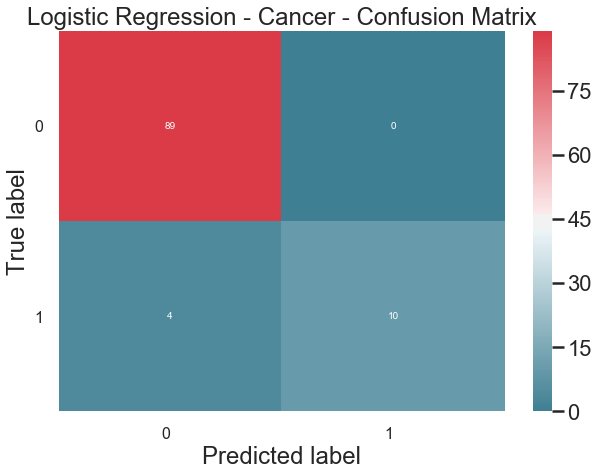

In [19]:
### Plot the confusion matrix
confmatrix(logreg_pred,"Logistic Regression - Cancer - Confusion Matrix")

#### Cross-validation of the Logistic Regression model

In [20]:
### Perform cross-validation then get the mean
logreg_cv = np.mean(cross_val_score(logreg, X_cv_sdf, y, cv=10)) * 100
print("Cross-Validation Scorev (10 folds):", logreg_cv)

C:\Users\Mystycalpha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mystycalpha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mystycalpha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mystycalpha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mystycalpha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

Cross-Validation Scorev (10 folds): 98.29761904761905


C:\Users\Mystycalpha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mystycalpha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mystycalpha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mystycalpha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### K-Nearest Neighbor

#### Build/Train the KNN Model

In [21]:
### Finding the best K

best_k = 0
best_score = 0

for k in range(3,200,2):
    ### Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k)

    ### Fit the model to the training set
    knn.fit(X_train_sdf,y_train)
    
    ### Predict on the Test Set
    knn_pred = knn.predict(X_test_sdf)

    ### Get accuracy
    score = metrics.accuracy_score(y_test,knn_pred) * 100
    
    if score >= best_score and k >= best_k:
        best_score = score
        best_k = k

### Print the best score and k
print("---Best results---\nK:", best_k, "\nScore:", best_score)

---Best results---
K: 3 
Score: 96.11650485436894


In [22]:
### Build final model using the best K 
### Set the value of K
k = best_k

### Instantiate the model
knn = KNeighborsClassifier(n_neighbors=k)

### Fit the model to the training set
knn.fit(X_train_sdf,y_train)

### Predict on the Test Set
knn_pred = knn.predict(X_test_sdf)

#### Validate the KNN model

In [23]:
### Predict on the Test Set
knn_pred = knn.predict(X_test_sdf)

In [24]:
### Get the metrics to test performance
knn_score = metrics.accuracy_score(y_test, knn_pred) * 100
knn_recall = metrics.recall_score(y_test, knn_pred) * 100

### Print Classification report
print("Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_test, knn_pred)))

print("Accuracy Score:", knn_score)

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        89
         1.0       1.00      0.71      0.83        14

    accuracy                           0.96       103
   macro avg       0.98      0.86      0.91       103
weighted avg       0.96      0.96      0.96       103


Accuracy Score: 96.11650485436894


This model also has a high **accuracy = 96%** and a decent **recall = 71%**.

This confusion matrix shows that the model predicts *0.0* more accurately as expected. 

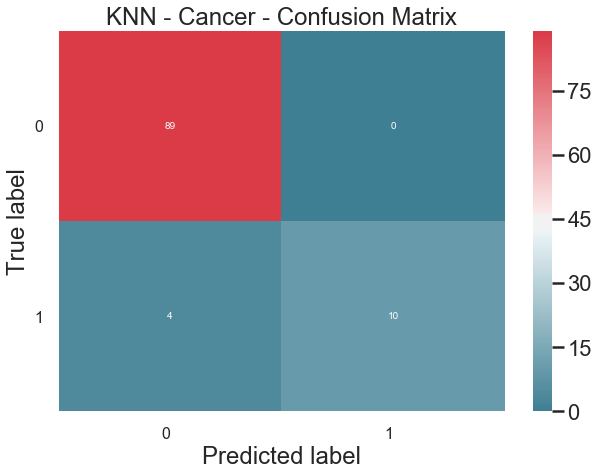

In [25]:
### Plot the confusion matrix for easier viewing
confmatrix(knn_pred,"KNN - Cancer - Confusion Matrix")

#### Cross-validation of the KNN model

In [26]:
### Perform cross-validation then get the mean
knn_cv = np.mean(cross_val_score(knn, X_cv_sdf, y, cv=10)) * 100
print("Cross-validation score (10 folds):", knn_cv)

Cross-validation score (10 folds): 98.05952380952381


### Decision Tree Classifier

#### Build/Train the Decision Tree model

In [27]:
### Instantiate the Algorithm
dtree = tree.DecisionTreeClassifier() #criterion="gini", min_samples_split=2, min_samples_leaf=1, random_state=12)

### Train the model
dtree.fit(X_train_sdf,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Validate the Decision Tree model

In [28]:
### Make predictions
dtree_pred = dtree.predict(X_test_sdf)

In [29]:
### Get the metrics to test performance
dtree_score = metrics.accuracy_score(y_test, dtree_pred) * 100
dtree_recall = metrics.recall_score(y_test, dtree_pred) * 100

### Print Classification report
print("Classification report for classifier %s:\n%s\n"
      % (dtree, metrics.classification_report(y_test, dtree_pred)))

print("Accuracy Score:", dtree_score)

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'):
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        89
         1.0       1.00      0.79      0.88        14

    accuracy                           0.97       103
   macro avg       0.98      0.89      0.93       103
weighted avg       0.97      0.97      0.97       103


Accuracy Score: 97.0873786407767


The **97% accuracy score** of this model is also high. This model also has highest **recall of 78%** compared to the other models tried in this notebook. 

Shown below is the confusion matrix.

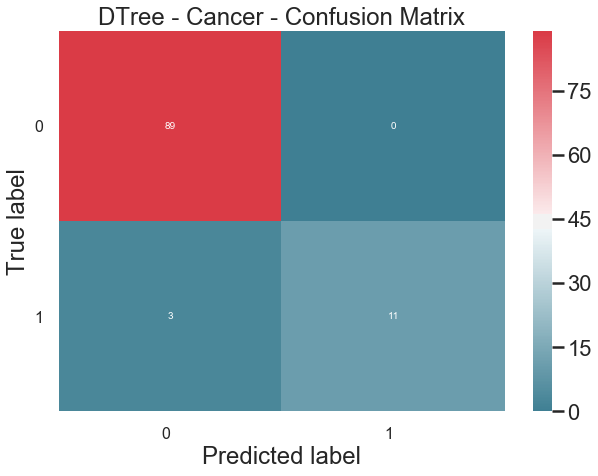

In [30]:
### Plot the confusion matrix for easier viewing
confmatrix(dtree_pred,"DTree - Cancer - Confusion Matrix")

#### Visualize Decision Tree model

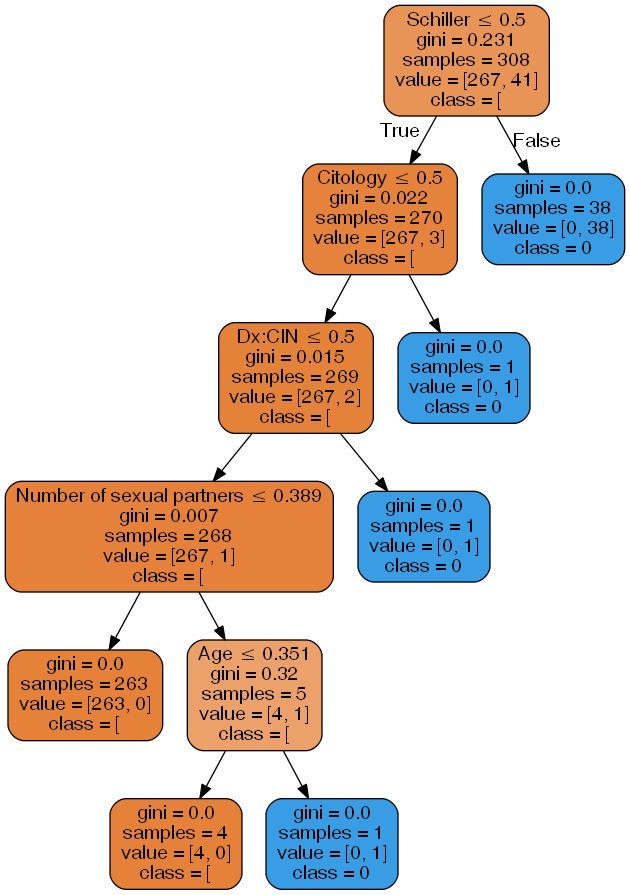

In [31]:
### Visualize Decision Tree
feature_col = X_train.columns
class_col = pd.unique(y_train)
class_col = np.array(class_col)
class_col = str(class_col).replace(" ", "")

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=feature_col,
               class_names=class_col)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [32]:
pd.DataFrame(dtree.feature_importances_, index = X_train.columns, 
             columns=["Importance"]).sort_values(by="Importance", ascending=False)

,Importance
Schiller,0.916531
Dx:CIN,0.027822
Citology,0.027616
Age,0.022508
Number of sexual partners,0.005522
Smokes,0.000000
STDs:genital herpes,0.000000
First sexual intercourse,0.000000
Hinselmann,0.000000
Dx,0.000000


The Decision Tree model only used five predictors but still got high accuracy and recall. 

All of the predictors for this model are same as the top predictors of the Logistic Regression model except for **Num of pregnancies** and **Number of sexual partners**. 

#### Cross-validation of the Decision Tree model

In [33]:
### Perform cross-validation
dtree_cv = np.mean(cross_val_score(dtree, X_cv_sdf, y, cv=10)) * 100
print("Cross-validation score (10 folds):", dtree_cv)

Cross-validation score (10 folds): 98.04761904761905


## Summary of Results

In [34]:
summary = pd.DataFrame(index=["K-Nearest Neighbor", "Logistic Regression", "Decision Tree Classifier"],
                       columns=["Accuracy Score", "Recall", "Cross-Validation Score"], 
                       data=[[knn_score, knn_recall, knn_cv], [logreg_score, logreg_recall, logreg_cv],
                             [dtree_score, dtree_recall, dtree_cv]])
summary

,Accuracy Score,Recall,Cross-Validation Score
K-Nearest Neighbor,96.116505,71.428571,98.059524
Logistic Regression,96.116505,71.428571,98.297619
Decision Tree Classifier,97.087379,78.571429,98.047619


Out of all the models tried, **the Decision Tree Classifier performed the best compared to the others because of its high accuracy and recall**.

The Decision Tree Classifier may have a slightly lower cross-validation score, but its high recall score makes it a better fit for this use case because **it is more favorable to incorrectly classify someone with a disease to perform more tests rather than missing someone that actually has a disease**.

It is highly recommended to gather more data for a more balanced dataset and try more advanced models. Also, it is recommended to try to fine tune these models since the parameters used here are all default.

## Special Thanks
* [FTW Foundation](http://www.ftwfoundation.org)